In [15]:
from scipy.io import wavfile
from scipy.signal import resample, butter, sosfilt
import matplotlib.pyplot as plt
from matplotlib import colorbar
import numpy as np
import tensorflow as tf
import keras
import pywt

In [34]:
file_name = "New_MVP_001"
sample_rate, raw_signal = wavfile.read(f".\\datasets\\raw\\dataset_full\\MVP\\{file_name}.wav")
duration = raw_signal.shape[0] / sample_rate
print(f"Duration: {duration}s")

Duration: 2.788875s


In [35]:
plt.title(f"Raw {file_name}")
fig = plt.plot(raw_signal)

In [70]:
preprocessed_signal = raw_signal / np.max(np.abs(raw_signal))
# preprocessed_signal = sosfilt(butter(4, (20, 150), btype='bandpass', output='sos', fs=sample_rate), preprocessed_signal)
preprocessed_signal = resample(preprocessed_signal, 20000)
print(f"Duration: {preprocessed_signal.shape[0] / sample_rate}s")

Duration: 2.5s


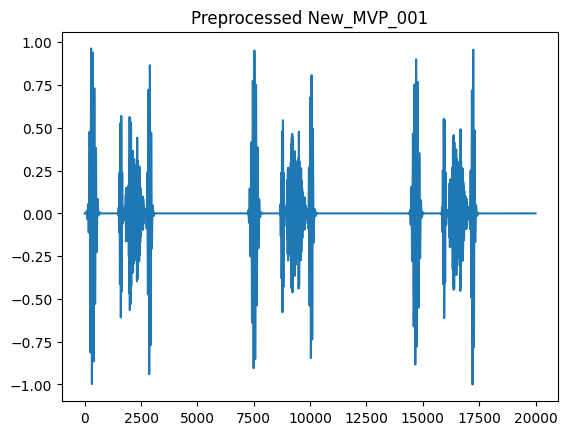

In [71]:
plt.title(f"Preprocessed {file_name}")
fig = plt.plot(preprocessed_signal)

In [72]:
time = np.linspace(0, 2.5, 20000)
scales = np.geomspace(1, 125, 100)
cwt_mat, freq = pywt.cwt(preprocessed_signal, scales, 'morl')

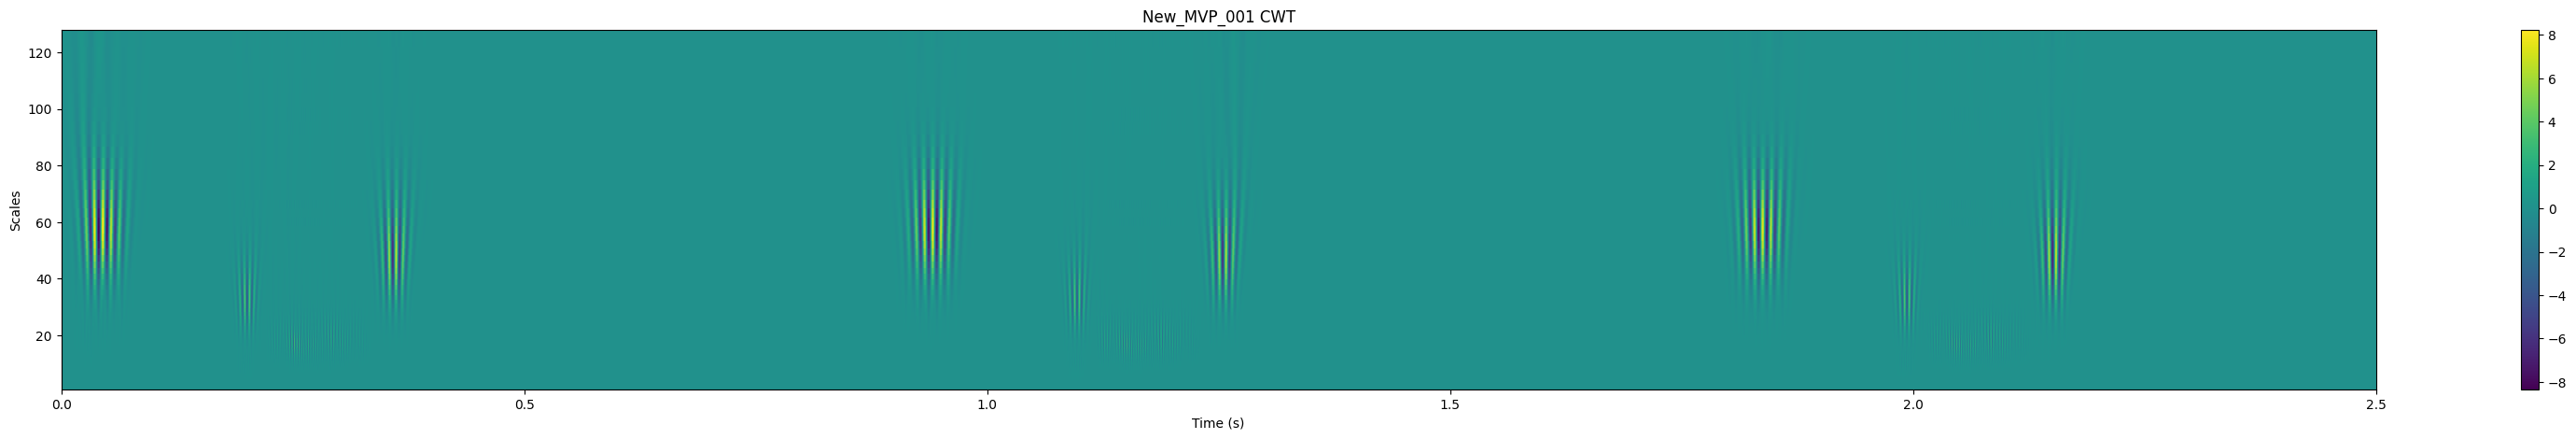

In [73]:
fig = plt.figure(figsize=(40, 5))
pcm = plt.pcolormesh(time, scales, cwt_mat)
plt.xlabel("Time (s)")
plt.ylabel("Scales")
plt.title(f"{file_name} CWT")
plt.colorbar()

In [34]:
model = keras.Sequential(name="PCGClassifier")
model.add(keras.Input(shape=(20000, 1)))
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=3, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool1D(pool_size=2))
model.add(keras.layers.Dropout(rate=0.15))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=5, activation="softmax"))
model.summary()

Model: "PCGClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_52 (Conv1D)              │ (None, 9999, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 9999, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_53 (Conv1D)              │ (None, 4999, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 4999, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_54 (Conv1D)              │ (None, 2499, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 2499, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_55 (Conv1D)              │ (None, 1249, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 1249, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_56 (Conv1D)              │ (None, 624, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 624, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_57 (Conv1D)              │ (None, 208, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 208, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_58 (Conv1D)              │ (None, 103, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 103, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 51, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 51, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1632)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       209,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,525 (1.07 MB)

 Trainable params: 278,693 (1.06 MB)

 Non-trainable params: 832 (3.25 KB)

In [17]:
model.compile(optimizer="adadelta", loss="categorical cross-entropy", metrics=["accuracy"])

In [ ]:
batchsize = 50
epochs = 50

In [73]:
s1 = tf.reshape(tf.range(0, 10), (10, 1))
s2 = tf.reshape(tf.range(10, 20), (10, 1))
s3 = tf.reshape(tf.range(20, 30), (10, 1))
dataset = tf.data.Dataset.from_tensor_slices(([s1, s2, s3], [1, 2, 3])).batch(2)
for x in dataset:
    print(x)

(<tf.Tensor: shape=(2, 10, 1), dtype=int32, numpy=
array([[[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9]],

       [[10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19]]])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2])>)
(<tf.Tensor: shape=(1, 10, 1), dtype=int32, numpy=
array([[[20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29]]])>, <tf.Tensor: shape=(1,), dtype=int32, numpy=array([3])>)
